# Adopción digital

# Importar librerías y Cargar datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sb
from sklearn.impute import SimpleImputer

In [ ]:
# MEN
MEN = pd.read_csv("MEN.csv", delimiter=",")

In [ ]:
# ICFES
ICFES = pd.read_csv("ICFES.csv", delimiter=",")
ICFES_2018_1 = pd.read_csv("Examen_Saber_11_20181.txt", delimiter=";")
ICFES_2018_2 = pd.read_csv("Examen_Saber_11_20182.txt", delimiter=";")
ICFES_2023_1 = pd.read_csv("Examen_Saber_11_20231.txt", delimiter=";")
ICFES_2023_2 = pd.read_csv("Examen_Saber_11_20232.txt", delimiter=";")
ICFES_2018_1 = ICFES_2018_1[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
ICFES_2018_2 = ICFES_2018_2[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
ICFES_2023_1 = ICFES_2023_1[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
ICFES_2023_2 = ICFES_2023_2[
    [
        "periodo",
        "estu_consecutivo",
        "estu_genero",
        "estu_cod_reside_mcpio",
        "estu_mcpio_reside",
        "estu_pais_reside",
        "fami_estratovivienda",
        "fami_tieneinternet"
    ]
]
# Convertir columnas a mayúsculas
ICFES_2018_1.columns = ICFES_2018_1.columns.str.upper()
ICFES_2018_2.columns = ICFES_2018_2.columns.str.upper()
ICFES_2023_1.columns = ICFES_2023_1.columns.str.upper()
ICFES_2023_2.columns = ICFES_2023_2.columns.str.upper()

/tmp/ipython-input-2338204470.py:3: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20,31,32,40,46,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  ICFES_2018_1 = pd.read_csv("Examen_Saber_11_20181.txt", delimiter=";")
/tmp/ipython-input-2338204470.py:4: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20,31,32,41,47,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  ICFES_2018_2 = pd.read_csv("Examen_Saber_11_20182.txt", delimiter=";")
/tmp/ipython-input-2338204470.py:5: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ICFES_2023_1 = pd.read_csv("Examen_Saber_11_20231.txt", delimiter=";")
/tmp/ipython-input-2338204470.py:6: DtypeWarning: Columns (4,5,6,7,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on

# Análisis preiliminar de los datos

## MEN

In [ ]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          14585 non-null  int64  
 1   CÓDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   CÓDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACIÓN_5_16               14579 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      14470 non-null  object 
 9   COBERTURA_NETA               14474 non-null  object 
 10  COBERTURA_NETA_TRANSICIÓN    14533 non-null  object 
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  object 
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  object 
 13  COBERTURA_NETA_M

In [ ]:
MEN = MEN[["AÑO", "CÓDIGO_MUNICIPIO", "MUNICIPIO", "POBLACIÓN_5_16", "COBERTURA_NETA"]]

In [ ]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes_MEN = {i:round(100*len(MEN[MEN.isnull().sum(axis=1) >= i])/len(MEN),2) for i in range(1,5)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes_MEN))

Porcentaje de filas con al menos i valores faltantes{1: 0.76, 2: 0.04, 3: 0.0, 4: 0.0}


In [ ]:
MEN

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA
0,2023,5004,Abriaquí,503,62.62%
1,2023,95025,El Retorno,4438,53.27%
2,2023,95200,Miraflores,2014,32.52%
3,2023,97001,Mitú,10986,59.57%
4,2023,97161,Caruru,1228,51.3%
...,...,...,...,...,...
14580,2011,5036,Angelópolis,1707,78.9%
14581,2011,5034,Andes,10244,84.5%
14582,2011,5031,Amalfi,5552,97.7%
14583,2011,5030,Amagá,6631,78.7%


## ICFES

In [ ]:
# Eliminar registros cuyo PERIODO empieza por 2018
ICFES = ICFES[~ICFES["PERIODO"].astype(str).str.startswith("2018")].copy()

In [ ]:
# Unir ICFES 2018 2023 al resto
ICFES = pd.concat([ICFES, ICFES_2018_1, ICFES_2018_2, ICFES_2023_1, ICFES_2023_2], ignore_index=True)

In [ ]:
# Se crea una función que realiza una exploración general a la base de datos
def descripcion(df):
  print("------------------ Descripción general de los datos ------------------")
  print("")
  print("En total la base de datos tiene " + str(len(df)) + " registros y " + str(df.shape[1])+ " variables.")
  print("")
  print("Los periodos evaluados son: " + str(df['PERIODO'].unique()))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['int', 'float']).columns)) + " variables numéricas, las cuales son: " + str(list(df.select_dtypes(include=['int', 'float']).columns)))
  print("")
  print("Hay " + str(len(df.select_dtypes(include=['object']).columns))+ " variables categóricas, las cuales son:" + str(list(df.select_dtypes(include=['object']).columns)))
  print("")
  print("Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:" +str(df.isnull().sum()/len(df)))
descripcion(ICFES)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 8431994 registros y 8 variables.

Los periodos evaluados son: [20131 20194 20122 20132 20162 20172 20102 20142 20111 20112 20152 20121
 20171 20151 20101 20201 20161 20191 20224 20221 20211 20141 20181 20182
 20231 20232]

Hay 2 variables numéricas, las cuales son: ['PERIODO', 'ESTU_COD_RESIDE_MCPIO']

Hay 6 variables categóricas, las cuales son:['ESTU_CONSECUTIVO', 'ESTU_GENERO', 'ESTU_MCPIO_RESIDE', 'ESTU_PAIS_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']

Algunas columnas tienen valores faltantes, a continuación se puede el porcentaje de valores nulos por columna:PERIODO                  0.000000
ESTU_CONSECUTIVO         0.000000
ESTU_COD_RESIDE_MCPIO    0.004915
ESTU_GENERO              0.000410
ESTU_MCPIO_RESIDE        0.004915
ESTU_PAIS_RESIDE         0.000000
FAMI_ESTRATOVIVIENDA     0.059992
FAMI_TIENEINTERNET       0.055795
dtype: float64


In [ ]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(ICFES[ICFES.isnull().sum(axis=1) >= i])/len(ICFES),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 6.41, 2: 5.54, 3: 0.39, 4: 0.26, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [ ]:
# Revisar consistencia
for column in ICFES.columns:
    print(f"Valores únicos en '{column}': {ICFES[column].unique()}")

Valores únicos en 'PERIODO': [20131 20194 20122 20132 20162 20172 20102 20142 20111 20112 20152 20121
 20171 20151 20101 20201 20161 20191 20224 20221 20211 20141 20181 20182
 20231 20232]
Valores únicos en 'ESTU_CONSECUTIVO': ['SB11201310000414' 'SB11201940464873' 'SB11201220204399' ...
 'SB11202340035671' 'SB11202340402303' 'SB11202340114953']
Valores únicos en 'ESTU_COD_RESIDE_MCPIO': [1.1001e+04 4.1016e+04 6.3130e+04 ... 9.9572e+04 3.1000e+01 9.0000e+00]
Valores únicos en 'ESTU_GENERO': ['F' 'M' nan]
Valores únicos en 'ESTU_MCPIO_RESIDE': ['BOGOTÁ D.C.' 'AIPE' 'CALARCÁ' ... 'TAMBORA' 'MÉXICO DF'
 'SANTIAGO DE CHILE']
Valores únicos en 'ESTU_PAIS_RESIDE': ['COLOMBIA' 'ESTADOS UNIDOS' 'VENEZUELA' 'ARGELIA' 'ECUADOR' 'ESPAÑA'
 'COREA DEL SUR' 'PANAMÁ' 'BRASIL' 'COMORAS' 'PERÚ' 'REINO UNIDO' 'MÉXICO'
 'BOLIVIA' 'DINAMARCA' 'BELICE' 'ANGOLA' 'TAIWAN' 'ITALIA' 'ARGENTINA'
 'CHILE' 'COREA DEL NORTE' 'TERRITORIOS PALESTINOS' 'JAPÓN' 'GUATEMALA'
 'ALEMANIA' 'COSTA RICA' 'COSTA DE MARFIL' 'A

#Procesar datos

## MEN

In [ ]:
# Mostrar registros con al menos un campo faltante
registros_con_faltantes_MEN = MEN[MEN.isnull().any(axis=1)]

registros_con_faltantes_MEN

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA
6741,2017,97777,Papunaua,211,NaN
6764,2017,91430,La Victoria,391,NaN
8947,2016,91430,La Victoria,397,NaN
8969,2016,97777,Papunaua,219,NaN
8979,2015,94887,Pana Pana,1039,NaN
...,...,...,...,...,...
14285,2011,19142,Caloto,4151,NaN
14315,2011,15600,Ráquira,4042,NaN
14414,2011,13490,Norosi,NaN,NaN
14448,2011,8573,Puerto Colombia,5872,NaN


In [ ]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AÑO               14585 non-null  int64 
 1   CÓDIGO_MUNICIPIO  14585 non-null  int64 
 2   MUNICIPIO         14585 non-null  object
 3   POBLACIÓN_5_16    14579 non-null  object
 4   COBERTURA_NETA    14474 non-null  object
dtypes: int64(2), object(3)
memory usage: 569.9+ KB


In [ ]:
# Eliminar registros con columnas vacías
MEN =  MEN[MEN.isnull().sum(axis=1) <= 1]
MEN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 0 to 14584
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AÑO               14579 non-null  int64 
 1   CÓDIGO_MUNICIPIO  14579 non-null  int64 
 2   MUNICIPIO         14579 non-null  object
 3   POBLACIÓN_5_16    14579 non-null  object
 4   COBERTURA_NETA    14474 non-null  object
dtypes: int64(2), object(3)
memory usage: 683.4+ KB


In [ ]:
# Asegurar que COBERTURA_NETA quede como número sin %
MEN["COBERTURA_NETA"] = (
    MEN["COBERTURA_NETA"]
    .astype(str)                      # forzar a string
    .str.replace("%", "", regex=False) # quitar %
    .str.strip()                       # quitar espacios
    .replace("", "0")                  # manejar vacíos
    .astype(float)                     # a número
)

/tmp/ipython-input-917790823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["COBERTURA_NETA"] = (


In [ ]:
# Asegurar que POBLACIÓN_5_16 también sea numérico
MEN["POBLACIÓN_5_16"] = (
    MEN["POBLACIÓN_5_16"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
    .replace("", "0")
    .astype(float)
)

/tmp/ipython-input-2972686280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["POBLACIÓN_5_16"] = (


In [ ]:
MEN.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA
0,2023,5004,Abriaquí,503.0,62.62
1,2023,95025,El Retorno,4438.0,53.27
2,2023,95200,Miraflores,2014.0,32.52
3,2023,97001,Mitú,10986.0,59.57
4,2023,97161,Caruru,1228.0,51.30


In [ ]:
MEN["Estudiantes_5_16"] = (
    MEN["POBLACIÓN_5_16"] * (MEN["COBERTURA_NETA"] / 100)
).round(0)

/tmp/ipython-input-3978968860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["Estudiantes_5_16"] = (


In [ ]:
MEN.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,POBLACIÓN_5_16,COBERTURA_NETA,Estudiantes_5_16
0,2023,5004,Abriaquí,503.0,62.62,315.0
1,2023,95025,El Retorno,4438.0,53.27,2364.0
2,2023,95200,Miraflores,2014.0,32.52,655.0
3,2023,97001,Mitú,10986.0,59.57,6544.0
4,2023,97161,Caruru,1228.0,51.30,630.0


In [ ]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 0 to 14584
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               14579 non-null  int64  
 1   CÓDIGO_MUNICIPIO  14579 non-null  int64  
 2   MUNICIPIO         14579 non-null  object 
 3   POBLACIÓN_5_16    14579 non-null  float64
 4   COBERTURA_NETA    14474 non-null  float64
 5   Estudiantes_5_16  14474 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 797.3+ KB


In [ ]:
# Agrupar por municipio y año
MEN = MEN.groupby(["CÓDIGO_MUNICIPIO", "MUNICIPIO", "AÑO"], as_index=False).agg(
    POBLACION_5_16=("POBLACIÓN_5_16", "sum"),
    Estudiantes_5_16=("Estudiantes_5_16", "sum"))

In [ ]:
MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CÓDIGO_MUNICIPIO  14579 non-null  int64  
 1   MUNICIPIO         14579 non-null  object 
 2   AÑO               14579 non-null  int64  
 3   POBLACION_5_16    14579 non-null  float64
 4   Estudiantes_5_16  14579 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 569.6+ KB


In [ ]:
MEN.head()

,CÓDIGO_MUNICIPIO,MUNICIPIO,AÑO,POBLACION_5_16,Estudiantes_5_16
0,0,NACIONAL,2019,9488850.0,87630.0
1,0,NACIONAL,2020,9540230.0,87741.0
2,0,NACIONAL,2021,9548263.0,87749.0
3,5001,Medellín,2011,386466.0,419316.0
4,5001,Medellín,2012,380839.0,412829.0


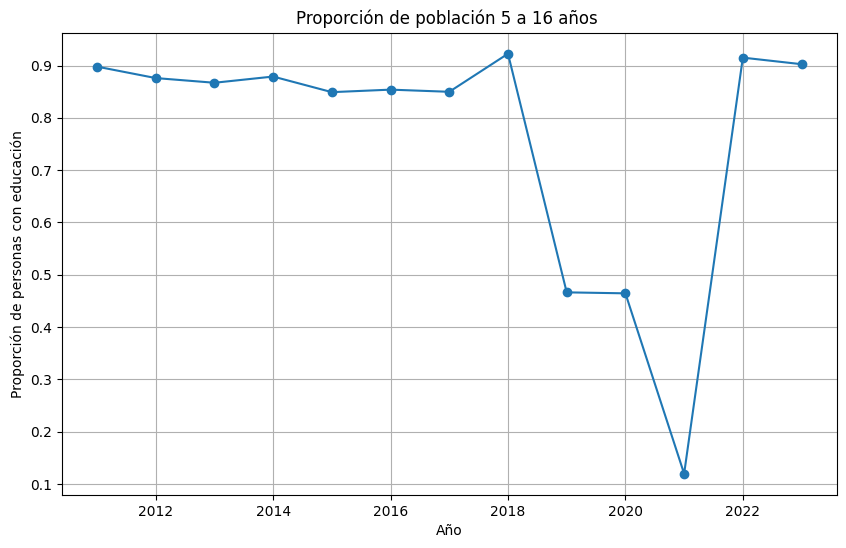

In [ ]:
import matplotlib.pyplot as plt

# Calcular la proporción por año
cobertura_año = MEN.groupby("AÑO").agg(
    Estudiantes_5_16=("Estudiantes_5_16", "sum"),
    POBLACION_5_16=("POBLACION_5_16", "sum")
).reset_index()

cobertura_año["Tasa_cobertura"] = cobertura_año["Estudiantes_5_16"] / cobertura_año["POBLACION_5_16"]

# Graficar
plt.figure(figsize=(10,6))
plt.plot(cobertura_año["AÑO"], cobertura_año["Tasa_cobertura"], marker="o")

plt.title("Proporción de población 5 a 16 años ")
plt.xlabel("Año")
plt.ylabel("Proporción de personas con educación")
plt.grid(True)
plt.show()

## CNC

In [ ]:
path_2018 = 'd2018.xlsx'
CNC2018 = pd.read_excel(path_2018)

path_2023 = 'd2023.xlsx'
CNC2023 = pd.read_excel(path_2023)

In [ ]:
print(len(CNC2018.columns))
print(len(CNC2023.columns))

867
1173


In [ ]:
selected_columns_2018 = [
    # Bloque 1: Geográficas
    'LAT_1', 'LONG_1', 'SECTOR', 'SECCION', 'MANZANA',

    # Bloque 2: # Sociodemográficas
    'EDAD', 'RANGO_EDAD', 'DH', 'PA', 'PB', 'PD', 'PB1', 'SEXO', 'ESTRATO',

    # Bloque 3: Administrativas
    'ID', 'FECHAINI', 'FECHAFIN', 'DIREC_VIVI', 'ESTUDIO', 'ENTREVISTADOR',

    # Bloque 4: Uso de internet
    'P7', 'P8', 'P9', 'P10', 'P11',

    # Bloque 5: Equipamiento de la vivienda
    'P15', 'P16_1', 'P16_2', 'P16_3', 'P16_4', 'P16_5', 'P16_6', 'P16_7',
    'P16_8', 'P16_9', 'P16_10', 'P16_11', 'P17', 'P19', 'P21',

    # Bloque 6: Conectividad del hogar
    'P27', 'P29',

    # Bloque 8: Percepciones sobre internet
    'P33', 'P34', 'P35', 'P36_1', 'P36_2', 'P36_3', 'P36_4',

    # Bloque 9: Comercio electrónico
    'P56', 'P57', 'P58', 'P59', 'P64', 'NIVEL_PIRAMIDEAJUSTA'
]
CNC2018_col_sel = CNC2018[selected_columns_2018]
CNC2018_col_sel

,LAT_1,LONG_1,SECTOR,SECCION,MANZANA,EDAD,RANGO_EDAD,DH,PA,PB,...,P36_1,P36_2,P36_3,P36_4,P56,P57,P58,P59,P64,NIVEL_PIRAMIDEAJUSTA
0,10.952493,-74.777018,2201,8,3,69,7,5,2,8001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,203,1,13,56,6,4,1,5001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,203,1,13,64,6,0,1,5001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,6.299582,-75.550590,203,2,2,38,4,8,1,5001,...,3.0,7.0,13.0,21.0,9.0,NaN,NaN,NaN,9.0,1
4,7.090175,-73.145032,798,2,25,43,4,8,5,68001,...,NaN,910.0,17.0,NaN,9.0,NaN,NaN,NaN,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,7.086000,-70.757413,0,0,0,18,2,4,5,81001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1
3479,7.063045,-70.758203,0,0,0,36,4,6,5,81001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0
3480,7.080648,-70.753662,0,0,0,18,2,8,5,81001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0
3481,7.063063,-70.758190,2,7,8,29,3,9,5,81001,...,NaN,NaN,NaN,2322.0,NaN,NaN,NaN,NaN,9.0,2


In [ ]:
selected_columns_2023 = [
    'GPSLONG',  # Longitud GPS
    'GPSLAT',   # Latitud GPS
    'GPSALT',   # Altitud GPS
    'GPSPRECISION',  # Precisión del GPS
    'REGION_BASE',  # Región base
    'REGIONAL',  # Regional
    'MUNICIPIO_BASE',  # Municipio base
    'MUNICIPIO',  # Municipio
    'DANE',  # Código DANE
    'POINT_X',  # Coordenada X
    'POINT_Y',  # Coordenada Y
    'ESTRATO',  # Estrato socioeconómico
    'SECTOR',  # Sector
    'SECCION',  # Sección
    'MANZANA',  # Manzana
    'PB1',
    'TIPO_ENCUESTA',  # Tipo de encuesta
    'TIPO',  # Tipo de vivienda o encuesta
    'GENERO',  # Género del entrevistado
    'EDAD',  # Edad del entrevistado
    'PERSONAS',  # Número de personas en el hogar
    'PERSONAS_GEN',  # Distribución de género por personas
    'GENERO_SEL',  # Género de la persona seleccionada
    'REDAD',  # Rango de edad
    'ALEATORIO_PDET',  # Indicador de muestreo aleatorio en zonas PDET
    'VERIFICA',  # Validación o verificación del encuestado
    'DIRECCION_FILTRO',  # Dirección registrada
    'B4_1', #Pregunta B4.1 Formulario
    'B4_2', #Pregunta B4.2 Formulario
    'B4_4_TOTAL', #Pregunta B4.4 Formulario
    'B4_5_TOTAL', #Pregunta B4.5 Formulario
    'B4_7', #Pregunta B4.7 Formulario
    'B5_1', 'B5_2_1', 'B5_2_2', 'B5_2_3', 'B5_2_4', 'B5_2_5', 'B5_2_6', 'B5_2_7',
    'B5_2_8', 'B5_2_9', 'B5_2_10', 'B5_2_11', 'B5_2_12', 'B5_3_1', 'B5_3_2', 'B5_3_3',
    'B5_3_4', 'B5_3_5', 'B5_3_6', 'B5_3_7', 'B5_3_8', 'B5_3_9', 'B5_3_10', 'B5_3_11',
    'B5_3_12', 'B5_6', 'B5_8', 'B6_1', 'B6_3', 'B7_1', 'B7_2', 'B8_1_1', 'B8_1_2', 'B8_1_3',
    'B8_1_4', 'B8_1_5', 'B8_1_6', 'B8_1_7', 'B8_1_8', 'B8_1_9', 'B8_2_1', 'B8_2_2',
    'B8_2_3', 'B8_2_4', 'B8_2_5', 'B8_2_6', 'B8_2_7', 'B8_2_8', 'B8_2_9', 'B8_2_10',
    'B8_2_11', 'B8_2_12', 'B8_2_13', 'B8_2_14', 'B8_2_15', 'B8_2_16', 'B8_2_17',
    'B8_2_18', 'B8_2_19', 'B8_2_20', 'B8_2_21', 'B8_2_22', 'B9_1', 'B9_2', 'nivel_piramide', 'B9_7'
]

CNC2023_col_sel = CNC2023[selected_columns_2023]
CNC2023_col_sel

,GPSLONG,GPSLAT,GPSALT,GPSPRECISION,REGION_BASE,REGIONAL,MUNICIPIO_BASE,MUNICIPIO,DANE,POINT_X,...,B8_2_17,B8_2_18,B8_2_19,B8_2_20,B8_2_21,B8_2_22,B9_1,B9_2,nivel_piramide,B9_7
0,73.136622,7.113799,9.219000e+15,14.0,5.0,5,NaN,8,68001,73.136564,...,5.0,5.0,5.0,5.0,5.0,3.0,7,9.0,1,9
1,72.513637,7.892464,3.220000e+02,11.0,5.0,5,NaN,13,54001,72.514909,...,4.0,4.0,4.0,4.0,4.0,4.0,7,9.0,1,9
2,72.513735,7.892379,3.208000e+16,10.0,5.0,5,NaN,13,54001,72.514909,...,NaN,NaN,NaN,NaN,NaN,NaN,3,7.0,0,9
3,72.535536,7.899648,2.114980e+05,5.0,5.0,5,NaN,13,54001,72.535004,...,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,0,9
4,72.536171,7.898150,2.984000e+15,4.0,5.0,5,NaN,13,54001,72.535004,...,8.0,8.0,5.0,5.0,5.0,8.0,4,102.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,74.066290,4.843900,2.581400e+14,28.0,NaN,1,NaN,32,25175,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,9,NaN,2,2
4175,NaN,NaN,NaN,NaN,NaN,1,NaN,32,25175,NaN,...,5.0,5.0,5.0,5.0,2.0,5.0,5,5.0,1,2
4176,74.055293,4.857498,2.581200e+15,4.0,NaN,1,NaN,32,25175,NaN,...,1.0,1.0,5.0,5.0,5.0,2.0,7,701.0,3,9
4177,74.056633,4.853827,NaN,1000.0,4.0,1,NaN,32,25175,74.053638,...,8.0,8.0,8.0,4.0,8.0,8.0,9,NaN,1,9


In [ ]:
CNC2018_col_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LAT_1                 2977 non-null   float64
 1   LONG_1                2977 non-null   float64
 2   SECTOR                3483 non-null   int64  
 3   SECCION               3483 non-null   int64  
 4   MANZANA               3483 non-null   int64  
 5   EDAD                  3483 non-null   int64  
 6   RANGO_EDAD            3483 non-null   int64  
 7   DH                    3483 non-null   int64  
 8   PA                    3483 non-null   int64  
 9   PB                    3483 non-null   int64  
 10  PD                    3483 non-null   int64  
 11  PB1                   3483 non-null   int64  
 12  SEXO                  3483 non-null   int64  
 13  ESTRATO               3483 non-null   int64  
 14  ID                    3483 non-null   int64  
 15  FECHAINI             

In [ ]:
CNC2023_col_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GPSLONG           3643 non-null   float64
 1   GPSLAT            3643 non-null   float64
 2   GPSALT            3508 non-null   float64
 3   GPSPRECISION      3643 non-null   float64
 4   REGION_BASE       3042 non-null   float64
 5   REGIONAL          4179 non-null   int64  
 6   MUNICIPIO_BASE    2 non-null      float64
 7   MUNICIPIO         4179 non-null   int64  
 8   DANE              4179 non-null   int64  
 9   POINT_X           3041 non-null   float64
 10  POINT_Y           3041 non-null   float64
 11  ESTRATO           4179 non-null   int64  
 12  SECTOR            4179 non-null   int64  
 13  SECCION           4179 non-null   int64  
 14  MANZANA           4179 non-null   int64  
 15  PB1               4179 non-null   int64  
 16  TIPO_ENCUESTA     4179 non-null   int64  


In [ ]:
# Verificar nulos
missing_percent_2018 = CNC2018_col_sel.isna().mean() * 100

missing_percent_2018

,0
LAT_1,14.527706
LONG_1,14.527706
SECTOR,0.000000
SECCION,0.000000
MANZANA,0.000000
EDAD,0.000000
RANGO_EDAD,0.000000
DH,0.000000
PA,0.000000
PB,0.000000


In [ ]:
# Verificar nulos
missing_percent_2023 = CNC2023_col_sel.isna().mean() * 100

missing_percent_2023

,0
GPSLONG,12.826035
GPSLAT,12.826035
GPSALT,16.056473
GPSPRECISION,12.826035
REGION_BASE,27.207466
...,...
B8_2_22,10.169897
B9_1,0.000000
B9_2,50.059823
nivel_piramide,0.000000


## ICFES

In [ ]:
# Eliminar registros de estudiantes que residen por fuera de Colombia
ICFES = ICFES[ICFES['ESTU_PAIS_RESIDE'] == 'COLOMBIA']
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8402386 entries, 0 to 8431993
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 576.9+ MB


In [ ]:
# Eliminar periodos anteriores a 2012
periodos_a_eliminar = [20102, 20111, 20112, 20101]
ICFES = ICFES[~ICFES['PERIODO'].isin(periodos_a_eliminar)]
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081965 entries, 0 to 8431993
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 486.3+ MB


In [ ]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(ICFES[ICFES.isnull().sum(axis=1) >= i])/len(ICFES),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 6.96, 2: 6.14, 3: 0.15, 4: 0.09, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [ ]:
# Eliminar registros con más de 2 columnas vacías
ICFES = ICFES[ICFES.isnull().sum(axis=1) <= 2]
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7071417 entries, 0 to 8431993
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 485.6+ MB


In [ ]:
# Eliminar registros con exactamente 2 columnas faltantes
ICFES = ICFES[ICFES.isnull().sum(axis=1) != 2]
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6647449 entries, 0 to 8430941
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   ESTU_PAIS_RESIDE       object 
 6   FAMI_ESTRATOVIVIENDA   object 
 7   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 456.4+ MB


In [ ]:
# Revisar si hay filas con una cantidad alta de datos faltantes
faltantes = {i:round(100*len(ICFES[ICFES.isnull().sum(axis=1) >= i])/len(ICFES),2) for i in range(1,10)}
print("Porcentaje de filas con al menos i valores faltantes"+ str(faltantes))

Porcentaje de filas con al menos i valores faltantes{1: 0.88, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [ ]:
# Mostrar registros con al menos un campo faltante
registros_con_faltantes = ICFES[ICFES.isnull().any(axis=1)]

registros_con_faltantes

,PERIODO,ESTU_CONSECUTIVO,ESTU_COD_RESIDE_MCPIO,ESTU_GENERO,ESTU_MCPIO_RESIDE,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
300,20194,SB11201940581723,73001.0,F,IBAGUÉ,COLOMBIA,NaN,No
301,20194,SB11201940581723,73001.0,F,IBAGUÉ,COLOMBIA,NaN,No
788,20171,SB11201710029895,76001.0,M,CALI,COLOMBIA,Estrato 3,NaN
853,20172,SB11201720314011,13657.0,M,SAN JUAN NEPOMUCENO,COLOMBIA,NaN,No
1848,20172,SB11201720480960,25086.0,F,BELTRÁN,COLOMBIA,Estrato 2,NaN
...,...,...,...,...,...,...,...,...
8392423,20232,SB11202340576174,47170.0,M,CHIVOLO,COLOMBIA,NaN,Si
8392424,20232,SB11202340330995,17777.0,M,SUPÍA,COLOMBIA,NaN,No
8392493,20232,SB11202340246697,52258.0,M,EL TABLÓN DE GÓMEZ,COLOMBIA,NaN,No
8392604,20232,SB11202340118932,5001.0,F,MEDELLÍN,COLOMBIA,Estrato 2,NaN


In [ ]:
# Imputación de la variable 'ESTU_GENERO' con la moda
# Calcular la moda de la columna 'ESTU_GENERO'
moda_genero = ICFES['ESTU_GENERO'].mode()[0]

# Reemplazar los valores faltantes con la moda
ICFES['ESTU_GENERO'].fillna(moda_genero, inplace=True)

# Verificar si la imputación fue exitosa
print(ICFES['ESTU_GENERO'].isnull().sum())

/tmp/ipython-input-699813981.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ICFES['ESTU_GENERO'].fillna(moda_genero, inplace=True)


0


In [ ]:
# Imputar 'FAMI_ESTRATOVIVIENDA' y 'FAMI_TIENEINTERNET' por la moda dentro de cada grupo de 'ESTU_COD_RESIDE_MCPIO'
for columna in ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']:
    # Imputación por la moda dentro de cada grupo
    ICFES[columna] = ICFES.groupby('ESTU_COD_RESIDE_MCPIO')[columna].transform(lambda x: x.fillna(x.mode()[0]))

# Verificación
print(ICFES[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']].isnull().sum())

FAMI_ESTRATOVIVIENDA    0
FAMI_TIENEINTERNET      0
dtype: int64


In [ ]:
ICFES.head(10)

,PERIODO,ESTU_CONSECUTIVO,ESTU_COD_RESIDE_MCPIO,ESTU_GENERO,ESTU_MCPIO_RESIDE,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
0,20131,SB11201310000414,11001.0,F,BOGOTÁ D.C.,COLOMBIA,Estrato 6,Si
1,20194,SB11201940464873,41016.0,F,AIPE,COLOMBIA,Estrato 2,Si
2,20194,SB11201940464873,41016.0,F,AIPE,COLOMBIA,Estrato 2,Si
3,20122,SB11201220204399,63130.0,F,CALARCÁ,COLOMBIA,Estrato 1,Si
4,20132,SB11201320464198,19001.0,F,POPAYÁN,COLOMBIA,Estrato 2,Si
5,20194,SB11201940562856,41396.0,F,LA PLATA,COLOMBIA,Estrato 1,No
6,20194,SB11201940562856,41396.0,F,LA PLATA,COLOMBIA,Estrato 1,No
7,20162,SB11201620084846,76001.0,M,CALI,COLOMBIA,Estrato 5,Si
8,20132,SB11201320184630,73319.0,M,GUAMO,COLOMBIA,Estrato 1,No
9,20172,SB11201720518410,5001.0,F,MEDELLÍN,COLOMBIA,Estrato 2,Si


In [ ]:
# Revisar consistencia
for column in ICFES.columns:
    print(f"Valores únicos en '{column}': {ICFES[column].unique()}")

Valores únicos en 'PERIODO': [20131 20194 20122 20132 20162 20172 20142 20152 20121 20171 20151 20201
 20161 20191 20224 20221 20211 20141 20181 20182 20231 20232]
Valores únicos en 'ESTU_CONSECUTIVO': ['SB11201310000414' 'SB11201940464873' 'SB11201220204399' ...
 'SB11202340487715' 'SB11202340610694' 'SB11202340007026']
Valores únicos en 'ESTU_COD_RESIDE_MCPIO': [11001. 41016. 63130. ... 94885. 91536. 99572.]
Valores únicos en 'ESTU_GENERO': ['F' 'M']
Valores únicos en 'ESTU_MCPIO_RESIDE': ['BOGOTÁ D.C.' 'AIPE' 'CALARCÁ' ... 'LA GUADALUPE' 'PUERTO ARICA'
 'TAMBORA']
Valores únicos en 'ESTU_PAIS_RESIDE': ['COLOMBIA']
Valores únicos en 'FAMI_ESTRATOVIVIENDA': ['Estrato 6' 'Estrato 2' 'Estrato 1' 'Estrato 5' 'Estrato 3' 'Estrato 4'
 'Sin Estrato']
Valores únicos en 'FAMI_TIENEINTERNET': ['Si' 'No']


In [ ]:
# Eliminar ESTU_PAIS_RESIDE
ICFES = ICFES.drop('ESTU_PAIS_RESIDE', axis=1)
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6647449 entries, 0 to 8430941
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERIODO                int64  
 1   ESTU_CONSECUTIVO       object 
 2   ESTU_COD_RESIDE_MCPIO  float64
 3   ESTU_GENERO            object 
 4   ESTU_MCPIO_RESIDE      object 
 5   FAMI_ESTRATOVIVIENDA   object 
 6   FAMI_TIENEINTERNET     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 405.7+ MB


In [ ]:
# Codificar acceso
ICFES["FAMI_TIENEINTERNET"] = ICFES["FAMI_TIENEINTERNET"].map({"Si": 1, "No": 0}).astype(int)

In [ ]:
# Crear variable año
ICFES["Año"] = ICFES["PERIODO"].astype(str).str[:4].astype(int)

In [ ]:
# Agrupar por municipio y año
ICFES = ICFES.groupby(["ESTU_COD_RESIDE_MCPIO", "ESTU_MCPIO_RESIDE", "Año"], as_index=False).agg(
    HOGARES_INTERNET=("FAMI_TIENEINTERNET", "sum"),
    POBLACIÓN_ICFES=("FAMI_TIENEINTERNET", "count"))

In [ ]:
ICFES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11461 entries, 0 to 11460
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ESTU_COD_RESIDE_MCPIO  11461 non-null  float64
 1   ESTU_MCPIO_RESIDE      11461 non-null  object 
 2   Año                    11461 non-null  int64  
 3   HOGARES_INTERNET       11461 non-null  int64  
 4   POBLACIÓN_ICFES        11461 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 447.8+ KB


In [ ]:
ICFES.head()

,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,Año,HOGARES_INTERNET,POBLACIÓN_ICFES
0,5001.0,MEDELLÍN,2012,38544,58496
1,5001.0,MEDELLÍN,2013,21484,29762
2,5001.0,MEDELLÍN,2014,23019,31146
3,5001.0,MEDELLÍN,2015,23380,30724
4,5001.0,MEDELLÍN,2016,22224,28662


In [ ]:
# Resumen por año
tabla_internet = ICFES.groupby("Año").agg(
    HOGARES_INTERNET=("HOGARES_INTERNET", "sum"),
    POBLACIÓN_ICFES=("POBLACIÓN_ICFES", "sum")
).reset_index()

# Agregar la tasa (opcional)
tabla_internet["TASA_INTERNET"] = tabla_internet["HOGARES_INTERNET"] / tabla_internet["POBLACIÓN_ICFES"]

tabla_internet


,Año,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET
0,2012,311006,671745,0.462982
1,2013,287120,583095,0.492407
2,2014,296253,569513,0.520187
3,2015,302810,569967,0.531276
4,2016,298949,560442,0.533416
5,2017,310702,537424,0.578132
6,2018,320052,537575,0.595363
7,2019,642651,1046365,0.614175
8,2020,13147,13823,0.951096
9,2021,14350,14749,0.972947


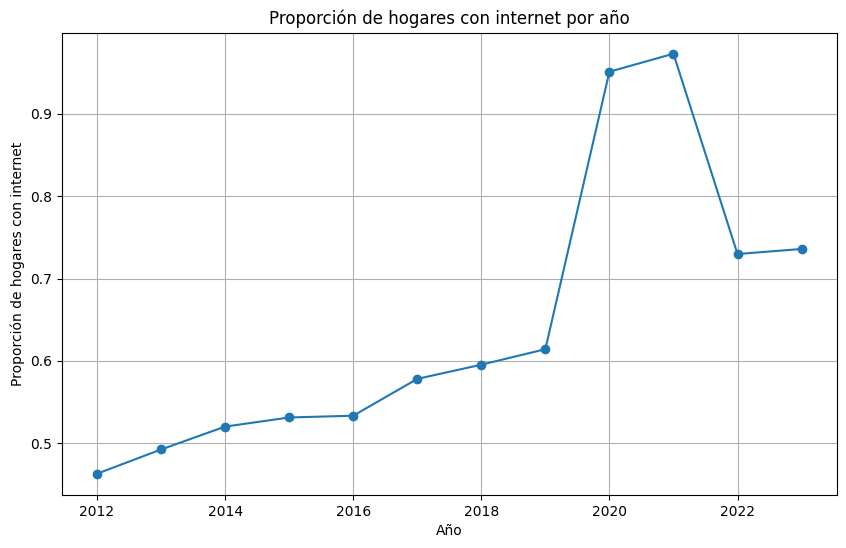

In [ ]:
import matplotlib.pyplot as plt

# Calcular la proporción por año
internet_por_año = ICFES.groupby("Año").agg(
    HOGARES_INTERNET=("HOGARES_INTERNET", "sum"),
    POBLACIÓN_ICFES=("POBLACIÓN_ICFES", "sum")
).reset_index()

internet_por_año["Tasa_Internet"] = internet_por_año["HOGARES_INTERNET"] / internet_por_año["POBLACIÓN_ICFES"]

# Graficar
plt.figure(figsize=(10,6))
plt.plot(internet_por_año["Año"], internet_por_año["Tasa_Internet"], marker="o")

plt.title("Proporción de hogares con internet por año")
plt.xlabel("Año")
plt.ylabel("Proporción de hogares con internet")
plt.grid(True)
plt.show()

## Consolidar datos

In [ ]:
def to_dane5(x):
    """Convierte a string de 5 dígitos (p.ej. 5001 -> '05001', 11001 -> '11001')."""
    if pd.isna(x):
        return pd.NA
    try:
        s = str(int(float(x)))
    except Exception:
        s = str(x).strip()
        s = ''.join(ch for ch in s if ch.isdigit())
    return s.zfill(5)

def map_genero(val):
    """Normaliza género a 1=Masculino, 2=Femenino (admite códigos o texto)."""
    if pd.isna(val):
        return pd.NA
    v = str(val).strip().upper()
    if v in {"1", "M", "H", "HOMBRE", "MASCULINO"}:
        return 1
    if v in {"2", "F", "MUJER", "FEMENINO"}:
        return 2
    # En CNC 2023 ya viene 1-2 intenta convertir
    try:
        n = int(float(v))
        if n in (1, 2):
            return n
    except Exception:
        pass
    return pd.NA

In [ ]:
# 1) CNC como BASE (2018 y 2023)
# ---- 2018
cnc18 = CNC2018_col_sel.copy()

# Llave municipio
cnc18["DANE5"] = cnc18["PB"].apply(to_dane5)
cnc18["AÑO"] = 2018

# Normalización de nombres y campos
cnc18 = cnc18.rename(columns={
    "LAT_1": "GPSLAT",
    "LONG_1": "GPSLONG",
    "RANGO_EDAD": "REDAD",
    "DIREC_VIVI": "DIRECCION_FILTRO",
    "NIVEL_PIRAMIDEAJUSTA": "NIVEL_PIRAMIDE",
    "PD": "PERSONAS"
})

# Genero desde SEXO -> GENERO (1=M, 2=F)
cnc18["GENERO"] = cnc18["SEXO"].apply(map_genero)

# Campos que no existen en 2018 (para homogeneidad con 2023)
for col_abs in ["GPSALT", "GPSPRECISION", "POINT_X", "POINT_Y",
                "REGION_BASE", "REGIONAL", "MUNICIPIO_BASE",
                "TIPO_ENCUESTA", "TIPO", "PERSONAS", "PERSONAS_GEN",
                "GENERO_SEL", "ALEATORIO_PDET", "VERIFICA", "DANE"]:
    if col_abs not in cnc18.columns:
        cnc18[col_abs] = pd.NA

# Asegurar DANE numérico tipo texto según diccionario
cnc18["DANE"] = cnc18["DANE5"]

# 2023
cnc23 = CNC2023_col_sel.copy()
cnc23["AÑO"] = 2023
cnc23["DANE5"] = cnc23["DANE"].apply(to_dane5)

# Normalizaciones
cnc23 = cnc23.rename(columns={
    "nivel_piramide": "NIVEL_PIRAMIDE",
    'B4_1': 'P7',
    'B4_4_TOTAL': 'P10',
    'B5_1': 'P15',
    'B6_1': 'P27',
    'B6_3': 'P29',
    'B7_1': 'P33',
    'B7_2': 'P34',
    'B9_1': 'P56',
    'B9_3': 'P57',
    'B9_7': 'P64',
    'B4_2': 'P9'
})
# Genero ya es 1-2, map_genero
cnc23["GENERO"] = cnc23["GENERO"].apply(map_genero)

# Unir bases CNC
CNC_BASE = pd.concat([cnc18, cnc23], ignore_index=True, sort=False)

# Eliminar columnas que no coinciden en ambas bases o son irrelevantes
cols_to_drop = [
    "P16_1", "P16_2", "P16_3", "P16_4", "P16_5", "P16_6", "P16_7", "P16_8", "P16_9", "P16_10", "P16_11",
    "P17", "P19", "P21", "P35", "P36_1", "P36_2", "P36_3", "P36_4", "P58", "P59",
    "B5_3_4", "B5_3_12", "B8_1_4", "B8_2_3", "B8_2_11", "B8_2_18",
    "B5_3_5", "B5_6", "B8_1_5", "B8_2_4", "B8_2_12", "B8_2_19",
    "B5_3_6", "B5_8", "B8_1_6", "B8_2_5", "B8_2_13", "B8_2_20",
    "B5_2_11", "B5_3_7", "B8_1_7", "B8_2_6", "B8_2_14", "B8_2_21",
    "B5_2_12", "B5_3_8", "B8_1_8", "B8_2_7", "B8_2_15", "B8_2_22",
    "B5_3_1", "B5_3_9", "B8_1_1", "B8_1_9", "B8_2_8", "B8_2_16",
    "B5_3_2", "B5_3_10", "B8_1_2", "B8_2_1", "B8_2_9", "B8_2_17", "B9_2",
    "B5_3_3", "B5_3_11", "B8_1_3", "B8_2_2", "B8_2_10",  "B5_2_1", "B5_2_2", "B5_2_3", "B5_2_4", "B5_2_5",
    "B5_2_6", "B5_2_7", "B5_2_8", "B5_2_9", "B5_2_10", "DH", "PA", "FECHAINI", "FECHAFIN", "ESTUDIO", "ENTREVISTADOR", "VERIFICA",
    "ALEATORIO_PDET", "SEXO", "GENERO_SEL", "GPSALT", "GPSPRECISION", "POINT_X", "POINT_Y", "REGION_BASE", "REGIONAL", "TIPO_ENCUESTA",
    "TIPO", "PERSONAS_GEN", "B4_5_TOTAL", "B4_7", "ID", "P8", "P11", "MUNICIPIO_BASE", "MUNICIPIO", "DANE", "PB"
]

CNC_BASE = CNC_BASE.drop(columns=cols_to_drop)

/tmp/ipython-input-3791021596.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  CNC_BASE = pd.concat([cnc18, cnc23], ignore_index=True, sort=False)


In [ ]:
CNC_BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GPSLAT            6620 non-null   float64
 1   GPSLONG           6620 non-null   float64
 2   SECTOR            7662 non-null   int64  
 3   SECCION           7662 non-null   int64  
 4   MANZANA           7662 non-null   int64  
 5   EDAD              7662 non-null   int64  
 6   REDAD             7662 non-null   int64  
 7   PERSONAS          7662 non-null   int64  
 8   PB1               7662 non-null   int64  
 9   ESTRATO           7662 non-null   int64  
 10  DIRECCION_FILTRO  7662 non-null   object 
 11  P7                7662 non-null   int64  
 12  P9                6683 non-null   float64
 13  P10               7662 non-null   object 
 14  P15               7662 non-null   object 
 15  P27               5978 non-null   float64
 16  P29               4870 non-null   float64


In [ ]:
orden_columnas = [
    "AÑO", "GPSLAT", "GPSLONG", "SECTOR", "SECCION", "MANZANA",
    "DIRECCION_FILTRO", "DANE5", "PB1", "PERSONAS", "EDAD", "REDAD",
    "GENERO", "ESTRATO", "P7", "P9", "P10", "P15", "P27", "P29",
    "P33", "P34", "P56", "P57", "P64", "NIVEL_PIRAMIDE"
]

CNC_BASE = CNC_BASE[orden_columnas]

In [ ]:
CNC_BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               7662 non-null   int64  
 1   GPSLAT            6620 non-null   float64
 2   GPSLONG           6620 non-null   float64
 3   SECTOR            7662 non-null   int64  
 4   SECCION           7662 non-null   int64  
 5   MANZANA           7662 non-null   int64  
 6   DIRECCION_FILTRO  7662 non-null   object 
 7   DANE5             7662 non-null   object 
 8   PB1               7662 non-null   int64  
 9   PERSONAS          7662 non-null   int64  
 10  EDAD              7662 non-null   int64  
 11  REDAD             7662 non-null   int64  
 12  GENERO            7662 non-null   int64  
 13  ESTRATO           7662 non-null   int64  
 14  P7                7662 non-null   int64  
 15  P9                6683 non-null   float64
 16  P10               7662 non-null   object 


In [ ]:
CNC_BASE

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,...,P10,P15,P27,P29,P33,P34,P56,P57,P64,NIVEL_PIRAMIDE
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,...,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,...,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,...,88,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,...,01,02,1.0,2.0,1.0,1.0,9.0,NaN,9.0,1
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,...,0102035106071112131549182023,010304,1.0,1.0,2.0,1.0,9.0,NaN,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,...,010624253043,0304,1.0,1.0,1.0,1.0,9.0,NaN,2.0,2
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,...,112123485741,01030508,1.0,1.0,1.0,1.0,5.0,NaN,2.0,1
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,...,01025106071112131415491820232529323335363743,0305,1.0,2.0,1.0,1.0,7.0,NaN,9.0,3
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,...,01020351060711,0203,1.0,1.0,4.0,1.0,9.0,NaN,9.0,1


In [ ]:
CNC_BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               7662 non-null   int64  
 1   GPSLAT            6620 non-null   float64
 2   GPSLONG           6620 non-null   float64
 3   SECTOR            7662 non-null   int64  
 4   SECCION           7662 non-null   int64  
 5   MANZANA           7662 non-null   int64  
 6   DIRECCION_FILTRO  7662 non-null   object 
 7   DANE5             7662 non-null   object 
 8   PB1               7662 non-null   int64  
 9   PERSONAS          7662 non-null   int64  
 10  EDAD              7662 non-null   int64  
 11  REDAD             7662 non-null   int64  
 12  GENERO            7662 non-null   int64  
 13  ESTRATO           7662 non-null   int64  
 14  P7                7662 non-null   int64  
 15  P9                6683 non-null   float64
 16  P10               7662 non-null   object 


In [ ]:
# 2) MEN (filtrar 2018/2023 y armar KPIs)
# MEN: ['CÓDIGO_MUNICIPIO','MUNICIPIO','AÑO','POBLACION_5_16','Estudiantes_5_16']

men = MEN.copy()
men = men[men["AÑO"].isin([2018, 2023])].copy()
men["DANE5"] = men["CÓDIGO_MUNICIPIO"].apply(to_dane5)
men["PROP_EDUC_5_16_MEN"] = (men["Estudiantes_5_16"] / men["POBLACION_5_16"]).replace([np.inf, -np.inf], np.nan)

In [ ]:
men

,CÓDIGO_MUNICIPIO,MUNICIPIO,AÑO,POBLACION_5_16,Estudiantes_5_16,DANE5,PROP_EDUC_5_16_MEN
10,5001,Medellín,2018,384358.0,372366.0,05001,0.968800
15,5001,Medellín,2023,377562.0,362233.0,05001,0.959400
23,5002,Abejorral,2018,3814.0,2907.0,05002,0.762192
28,5002,Abejorral,2023,3634.0,2703.0,05002,0.743808
36,5004,Abriaquí,2018,517.0,349.0,05004,0.675048
...,...,...,...,...,...,...,...
14552,99524,La Primavera,2023,2659.0,2551.0,99524,0.959383
14560,99624,Santa Rosalía,2018,1187.0,954.0,99624,0.803707
14565,99624,Santa Rosalía,2023,1159.0,972.0,99624,0.838654
14573,99773,Cumaribo,2018,23902.0,9862.0,99773,0.412601


In [ ]:
# Diccionario DANE5 --> nombre municipio
mpio_nombres = men[["DANE5", "MUNICIPIO"]].drop_duplicates(subset=["DANE5"]).rename(columns={"MUNICIPIO": "MUNICIPIO_NOMBRE"})

men_kpis = men[["DANE5", "AÑO", "POBLACION_5_16", "Estudiantes_5_16", "PROP_EDUC_5_16_MEN"]].copy()
assert not men_kpis.duplicated(["DANE5", "AÑO"]).any(), "MEN tiene llaves duplicadas DANE5-AÑO"

# 3) ICFES (ya agregado por municipio-año)
# ICFES: ['ESTU_COD_RESIDE_MCPIO','ESTU_MCPIO_RESIDE','Año','HOGARES_INTERNET','POBLACIÓN_ICFES']

icfes = ICFES.copy()
icfes = icfes[icfes["Año"].isin([2018, 2023])].copy()
icfes["DANE5"] = icfes["ESTU_COD_RESIDE_MCPIO"].apply(to_dane5)
icfes = icfes.rename(columns={"Año": "AÑO"})
icfes["TASA_INTERNET_ICFES"] = (icfes["HOGARES_INTERNET"] / icfes["POBLACIÓN_ICFES"]).replace([np.inf, -np.inf], np.nan)

icfes_kpis = icfes[["DANE5", "AÑO", "HOGARES_INTERNET", "POBLACIÓN_ICFES", "TASA_INTERNET_ICFES"]].copy()
assert not icfes_kpis.duplicated(["DANE5", "AÑO"]).any(), "ICFES tiene llaves duplicadas DANE5-AÑO"

# 4) MERGE sobre CNC (left) y agregar nombre de municipio

cnc_enriquecido = (
    CNC_BASE
    .merge(men_kpis, on=["DANE5", "AÑO"], how="left")
    .merge(icfes_kpis, on=["DANE5", "AÑO"], how="left")
    .merge(mpio_nombres, on="DANE5", how="left")
)

# Cobertura de los merges
print("Filas CNC_BASE:", len(CNC_BASE))
print("Cobertura MEN:", cnc_enriquecido["POBLACION_5_16"].notna().mean().round(3))
print("Cobertura ICFES:", cnc_enriquecido["POBLACIÓN_ICFES"].notna().mean().round(3))

# 5) Panel municipal (agregado municipio-año)
#    — métricas de CNC (conteo, edad promedio, % mujeres) + MEN + ICFES

def pct_mujeres(s):
    s = pd.to_numeric(s, errors="coerce")
    return np.nan if s.isna().all() else (s.eq(2).mean())

cnc_mpio = (
    cnc_enriquecido
    .groupby(["DANE5", "MUNICIPIO_NOMBRE", "AÑO"], as_index=False)
    .agg(
        ENCUESTAS_CNC=("AÑO", "size"),
        EDAD_PROM=("EDAD", "mean"),
        PROP_MUJERES=("GENERO", pct_mujeres),
        NIVEL_PIRAMIDE_PROM=("NIVEL_PIRAMIDE", "mean")
    )
)

panel_mpio = (
    cnc_mpio
    .merge(men_kpis, on=["DANE5", "AÑO"], how="left")
    .merge(icfes_kpis, on=["DANE5", "AÑO"], how="left")
)

# 6) Columnas clave para revisión rápida

cols_cnc = [c for c in [
    "AÑO","DANE5","MUNICIPIO_NOMBRE","GPSLAT","GPSLONG","EDAD","REDAD","GENERO",
    "NIVEL_PIRAMIDE","SECTOR","SECCION","MANZANA",
    "POBLACION_5_16","Estudiantes_5_16","PROP_EDUC_5_16_MEN",
    "HOGARES_INTERNET","POBLACIÓN_ICFES","TASA_INTERNET_ICFES"
] if c in cnc_enriquecido.columns]

cols_panel = [c for c in [
    "AÑO","DANE5","MUNICIPIO_NOMBRE",
    "ENCUESTAS_CNC","EDAD_PROM","PROP_MUJERES","NIVEL_PIRAMIDE_PROM",
    "POBLACION_5_16","Estudiantes_5_16","PROP_EDUC_5_16_MEN",
    "HOGARES_INTERNET","POBLACIÓN_ICFES","TASA_INTERNET_ICFES"
] if c in panel_mpio.columns]

print("\nVista rápida CNC enriquecido:")
display(cnc_enriquecido[cols_cnc])

# print("\nVista rápida Panel municipal:")
# display(panel_mpio[cols_panel].head(10))

# (Opcional) Guardar
# cnc_enriquecido.to_parquet("data/cnc_enriquecido_2018_2023.parquet", index=False)
# panel_mpio.to_parquet("data/panel_mpio_2018_2023.parquet", index=False)

Filas CNC_BASE: 7662
Cobertura MEN: 1.0
Cobertura ICFES: 1.0

Vista rápida CNC enriquecido:


,AÑO,DANE5,MUNICIPIO_NOMBRE,GPSLAT,GPSLONG,EDAD,REDAD,GENERO,NIVEL_PIRAMIDE,SECTOR,SECCION,MANZANA,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES
0,2018,08001,Barranquilla,10.952493,-74.777018,69,7,2,0,2201,8,3,233015.0,235368.0,1.010098,11425,16359,0.698392
1,2018,05001,Medellín,NaN,NaN,56,6,2,0,203,1,13,384358.0,372366.0,0.968800,21663,26759,0.809559
2,2018,05001,Medellín,NaN,NaN,64,6,2,0,203,1,13,384358.0,372366.0,0.968800,21663,26759,0.809559
3,2018,05001,Medellín,6.299582,-75.550590,38,4,1,1,203,2,2,384358.0,372366.0,0.968800,21663,26759,0.809559
4,2018,68001,Bucaramanga,7.090175,-73.145032,43,4,1,2,798,2,25,94655.0,95781.0,1.011896,5355,6446,0.830748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,25175,Chía,4.843900,74.066290,69,7,1,2,1,3,19,24997.0,27437.0,1.097612,1715,1839,0.932572
7658,2023,25175,Chía,NaN,NaN,24,2,1,1,1,2,7,24997.0,27437.0,1.097612,1715,1839,0.932572
7659,2023,25175,Chía,4.857498,74.055293,47,5,1,3,1,7,5,24997.0,27437.0,1.097612,1715,1839,0.932572
7660,2023,25175,Chía,4.853827,74.056633,58,6,2,1,2,6,35,24997.0,27437.0,1.097612,1715,1839,0.932572


In [ ]:
# Agregar nombre municipio

DIVIPOLA = pd.read_csv("DIVIPOLA.csv", delimiter=",")
DANE = DIVIPOLA.copy()
DANE["DANE5"] = DIVIPOLA["Código Municipio"].apply(to_dane5)

In [ ]:
Completo = cnc_enriquecido.merge(
    DANE[["DANE5", "Nombre Municipio", "Nombre Departamento"]],
    on="DANE5",
    how="left"
)
Completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AÑO                  7662 non-null   int64  
 1   GPSLAT               6620 non-null   float64
 2   GPSLONG              6620 non-null   float64
 3   SECTOR               7662 non-null   int64  
 4   SECCION              7662 non-null   int64  
 5   MANZANA              7662 non-null   int64  
 6   DIRECCION_FILTRO     7662 non-null   object 
 7   DANE5                7662 non-null   object 
 8   PB1                  7662 non-null   int64  
 9   PERSONAS             7662 non-null   int64  
 10  EDAD                 7662 non-null   int64  
 11  REDAD                7662 non-null   int64  
 12  GENERO               7662 non-null   int64  
 13  ESTRATO              7662 non-null   int64  
 14  P7                   7662 non-null   int64  
 15  P9                   6683 non-null   f

In [ ]:
Completo

,AÑO,GPSLAT,GPSLONG,SECTOR,SECCION,MANZANA,DIRECCION_FILTRO,DANE5,PB1,PERSONAS,...,NIVEL_PIRAMIDE,POBLACION_5_16,Estudiantes_5_16,PROP_EDUC_5_16_MEN,HOGARES_INTERNET,POBLACIÓN_ICFES,TASA_INTERNET_ICFES,MUNICIPIO_NOMBRE,Nombre Municipio,Nombre Departamento
0,2018,10.952493,-74.777018,2201,8,3,Kr 14 # 21 105,08001,1,1,...,0,233015.0,235368.0,1.010098,11425,16359,0.698392,Barranquilla,BARRANQUILLA,ATLÁNTICO
1,2018,NaN,NaN,203,1,13,kra 46A # 110_64,05001,1,5,...,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
2,2018,NaN,NaN,203,1,13,Kra 46A # 110_60,05001,1,4,...,0,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
3,2018,6.299582,-75.550590,203,2,2,kra 109 201 _28,05001,1,2,...,1,384358.0,372366.0,0.968800,21663,26759,0.809559,Medellín,MEDELLÍN,ANTIOQUIA
4,2018,7.090175,-73.145032,798,2,25,Cll 58 47 aw 8,68001,1,4,...,2,94655.0,95781.0,1.011896,5355,6446,0.830748,Bucaramanga,BUCARAMANGA,SANTANDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,2023,4.843900,74.066290,1,3,19,Calle14 13 80,25175,1,5,...,2,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7658,2023,NaN,NaN,1,2,7,Cl 6 a 3 99,25175,1,4,...,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7659,2023,4.857498,74.055293,1,7,5,Calle 10 4 48 capincito,25175,1,5,...,3,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA
7660,2023,4.853827,74.056633,2,6,35,Cea 3 6 20,25175,1,3,...,1,24997.0,27437.0,1.097612,1715,1839,0.932572,Chía,CHÍA,CUNDINAMARCA


In [ ]:
# Exportar df
Completo.to_excel("Datos.xlsx", index=False)